## RFM, 고객 군집 분석
- r : 시점
- f : 빈도
- m : 금액

## olist_order_payments_dataset
- order_id, payment_value
## olist_orders_dataset
- order_id, customer_id, order_delivered_customer_date

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [81]:
df1 = pd.read_csv('datasets/olist_order_payments_dataset.csv')
df1.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [82]:
df1.shape

(103886, 5)

In [83]:
df1 = df1[['order_id', 'payment_value']]
df1.head()

,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45


In [84]:
df2 = pd.read_csv('datasets/olist_orders_dataset.csv')
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [85]:
df2.shape

(99441, 8)

In [86]:
df2 = df2[['order_id', 'customer_id', 'order_delivered_customer_date']]
df2.head()

,order_id,customer_id,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02


In [87]:
df = pd.merge(df1, df2, on='order_id')
df.head()

,order_id,payment_value,customer_id,order_delivered_customer_date
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,2018-05-09 17:36:51
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-29 20:32:09
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-18 17:24:41
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-21 01:35:51
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-06-01 21:44:53


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   payment_value                  103886 non-null  float64
 2   customer_id                    103886 non-null  object 
 3   order_delivered_customer_date  100754 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [89]:
df[df['order_delivered_customer_date'].isnull()]

,order_id,payment_value,customer_id,order_delivered_customer_date
28,5d9c5817e278892b7498d90bfa28ade8,290.16,b583a7efe4522c8ce8942bd47f33d487,NaN
47,afef48d3c8a0b1b7c9b7f8f922fb5674,153.41,65f09de0b77ca07963fde8601c6be1fb,NaN
63,c108072ab31ec90a754129c171577f5f,210.82,a979b3cbd898fd8be91a290a667fd0d4,NaN
68,947e9c6bfd83a06953c420ef92d3da6e,69.46,2737211835d5ea370af15ee145f7840c,NaN
114,f090de1b2ed9f4e251662cb31e3c7127,27.63,ab2b94cec822788e131f15e0033544cf,NaN
...,...,...,...,...
103807,974f9f87a3bad01b2ac72fe987505e9b,91.18,b8bd03cdd075b29c82a9c55e5cd8e224,NaN
103834,8da21fa53a570d0624c7a5d0c14c617a,252.68,df7338a04458506a3b2f23056c466e88,NaN
103878,2e3d96522c8c378d4135c12a65c977aa,47.62,cd0a090974c3b64acf613c18f9fcfe83,NaN
103880,7159096c5aa9be77f7f0c26c01ee9793,280.65,d8f3aacf5cf5ddf9ceef4ad39e874c98,NaN


In [90]:
df = df[df['order_delivered_customer_date'].notnull()]
df.shape

(100754, 4)

## Monetary Value

In [91]:
df['payment_value'].describe()

count    100754.000000
mean        153.064210
std         214.453176
min           0.000000
25%          56.780000
50%         100.000000
75%         171.290000
max       13664.080000
Name: payment_value, dtype: float64

In [92]:
df = df.drop_duplicates().copy()
df.shape

(100172, 4)

In [93]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_delivered_customer_date'].head(1)

0   2018-05-09 17:36:51
Name: order_delivered_customer_date, dtype: datetime64[ns]

In [94]:
last_timestamp = df['order_delivered_customer_date'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2018-10-18 13:22:46')

In [95]:
rfm = df.groupby('customer_id').agg({'order_delivered_customer_date' : lambda x : (last_timestamp - x.max()).days,
                                     'order_id' : 'count',
                                     'payment_value' : 'sum'})
rfm.head()

,order_delivered_customer_date,order_id,payment_value
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74
000161a058600d5901f007fab4c27140,449,1,67.41
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42
0002414f95344307404f0ace7a26f1d5,399,1,179.35
000379cdec625522490c315e70c7a9fb,187,1,107.01


In [96]:
rfm = rfm.rename(columns={'order_delivered_customer_date' : 'Recency',
                          'order_id' : 'Frequency',
                          'payment_value' : 'Monetary'})
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74
000161a058600d5901f007fab4c27140,449,1,67.41
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42
0002414f95344307404f0ace7a26f1d5,399,1,179.35
000379cdec625522490c315e70c7a9fb,187,1,107.01


In [97]:
rfm.describe()

# F, M 의 이상치가 존재함. 군집분석에서 제외할 예정

,Recency,Frequency,Monetary
count,96475.000000,96475.000000,96475.000000
mean,276.372760,1.038321,159.673841
std,152.272389,0.296047,218.715204
min,1.000000,1.000000,6.150000
25%,155.000000,1.000000,61.780000
50%,257.000000,1.000000,105.200000
75%,387.000000,1.000000,176.220000
max,736.000000,22.000000,13664.080000


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

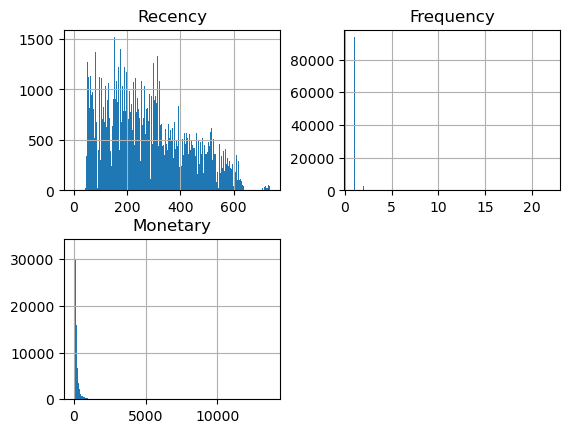

In [98]:
rfm.hist(bins=200)

## 모형 (qcut)

In [99]:
r_labels = list(range(5,0, -1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))

cut_size = 5

In [100]:
r_qcut = pd.qcut(x=rfm['Recency'].rank(method='first'), q=cut_size, labels=r_labels)
r_qcut.value_counts()

f_qcut = pd.qcut(x=rfm['Frequency'].rank(method='first'), q=cut_size, labels=f_labels)
f_qcut.value_counts()

m_qcut = pd.qcut(x=rfm['Monetary'].rank(method='first'), q=cut_size, labels=m_labels)
m_qcut.value_counts()

Monetary
1    19295
2    19295
3    19295
4    19295
5    19295
Name: count, dtype: int64

- ValueError: Bin edges must be unique 에러
- pd.qcut(df.rank(method='first'), nbins) : rank(method='first') 로 해결
- 4분위수를 구한다하면 중복값이 많을 경우 사분위수가 [3,3,3,3] , [5] , [7], ... 이런 식이라 오류 발생

In [101]:
rfm = rfm.assign(R=r_qcut, F=f_qcut, M=m_qcut)
rfm.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74,2,1,3
000161a058600d5901f007fab4c27140,449,1,67.41,1,1,2
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42,1,1,4
0002414f95344307404f0ace7a26f1d5,399,1,179.35,2,1,4
000379cdec625522490c315e70c7a9fb,187,1,107.01,4,1,3


In [102]:
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74,2,1,3,213
000161a058600d5901f007fab4c27140,449,1,67.41,1,1,2,112
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42,1,1,4,114
0002414f95344307404f0ace7a26f1d5,399,1,179.35,2,1,4,214
000379cdec625522490c315e70c7a9fb,187,1,107.01,4,1,3,413


In [103]:
rfm['RFM_score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74,2,1,3,213,6
000161a058600d5901f007fab4c27140,449,1,67.41,1,1,2,112,4
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42,1,1,4,114,6
0002414f95344307404f0ace7a26f1d5,399,1,179.35,2,1,4,214,7
000379cdec625522490c315e70c7a9fb,187,1,107.01,4,1,3,413,8
...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,210,1,91.91,4,5,3,453,12
fffecc9f79fd8c764f843e9951b11341,190,3,81.36,4,5,2,452,11
fffeda5b6d849fbd39689bb92087f431,131,1,63.13,4,5,2,452,11


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Monetary'}>],
       [<Axes: title={'center': 'R'}>, <Axes: title={'center': 'F'}>,
        <Axes: title={'center': 'M'}>],
       [<Axes: title={'center': 'RFM_segment'}>,
        <Axes: title={'center': 'RFM_score'}>, <Axes: >]], dtype=object)

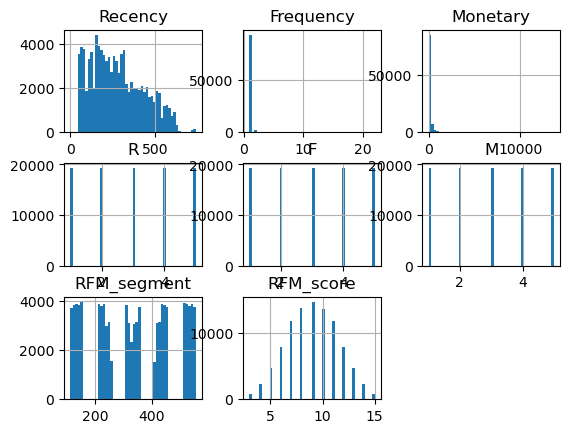

In [104]:
rfm.astype(int).hist(bins=50)

In [105]:
rfm.groupby("RFM_score").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'Monetary':['mean', 'sum']
                             }).style.background_gradient().format("{:,.0f}")

In [136]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=3, labels=['silver', 'gold', 'platinum'])
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,RFM_class
customer_id,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74,2,1,3,213,6,silver
000161a058600d5901f007fab4c27140,449,1,67.41,1,1,2,112,4,silver
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42,1,1,4,114,6,silver
0002414f95344307404f0ace7a26f1d5,399,1,179.35,2,1,4,214,7,silver
000379cdec625522490c315e70c7a9fb,187,1,107.01,4,1,3,413,8,silver
...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,210,1,91.91,4,5,3,453,12,platinum
fffecc9f79fd8c764f843e9951b11341,190,3,81.36,4,5,2,452,11,platinum
fffeda5b6d849fbd39689bb92087f431,131,1,63.13,4,5,2,452,11,platinum


In [137]:
rfm.groupby("RFM_class")['RFM_score'].describe()

C:\Users\hmins\AppData\Local\Temp\ipykernel_12448\2881352182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("RFM_class")['RFM_score'].describe()


,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,40962.0,6.667106,1.299028,3.0,6.0,7.0,8.0,8.0
gold,28182.0,9.479881,0.499604,9.0,9.0,9.0,10.0,10.0
platinum,27331.0,12.001573,1.096662,11.0,11.0,12.0,13.0,15.0


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

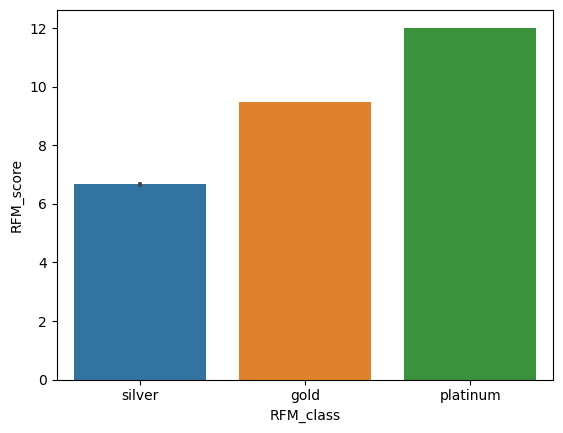

In [138]:
sns.barplot(data=rfm, x='RFM_class', y='RFM_score')

In [139]:
rfm.groupby('RFM_class').agg({'Recency' : 'mean',
                              'Frequency':'mean',
                              'Monetary' : ['mean','sum','count']})


C:\Users\hmins\AppData\Local\Temp\ipykernel_12448\43568144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('RFM_class').agg({'Recency' : 'mean',


Recency Frequency    Monetary                   
                 mean      mean        mean         sum  count
RFM_class                                                     
silver     357.711391  1.016186   94.778114  3882301.11  40962
gold       256.740792  1.041551  162.324752  4574636.16  28182
platinum   174.710731  1.068164  254.202060  6947596.50  27331

## 군집화(Clustering)


In [148]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,RFM_class
customer_id,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74,2,1,3,213,6,silver
000161a058600d5901f007fab4c27140,449,1,67.41,1,1,2,112,4,silver
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42,1,1,4,114,6,silver
0002414f95344307404f0ace7a26f1d5,399,1,179.35,2,1,4,214,7,silver
000379cdec625522490c315e70c7a9fb,187,1,107.01,4,1,3,413,8,silver
...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,210,1,91.91,4,5,3,453,12,platinum
fffecc9f79fd8c764f843e9951b11341,190,3,81.36,4,5,2,452,11,platinum
fffeda5b6d849fbd39689bb92087f431,131,1,63.13,4,5,2,452,11,platinum


In [149]:
rfm_cluster = rfm.iloc[:, :3]
rfm_cluster.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74
000161a058600d5901f007fab4c27140,449,1,67.41
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42
0002414f95344307404f0ace7a26f1d5,399,1,179.35
000379cdec625522490c315e70c7a9fb,187,1,107.01


In [150]:
rfm_cluster.describe()

,Recency,Frequency,Monetary
count,96475.000000,96475.000000,96475.000000
mean,276.372760,1.038321,159.673841
std,152.272389,0.296047,218.715204
min,1.000000,1.000000,6.150000
25%,155.000000,1.000000,61.780000
50%,257.000000,1.000000,105.200000
75%,387.000000,1.000000,176.220000
max,736.000000,22.000000,13664.080000


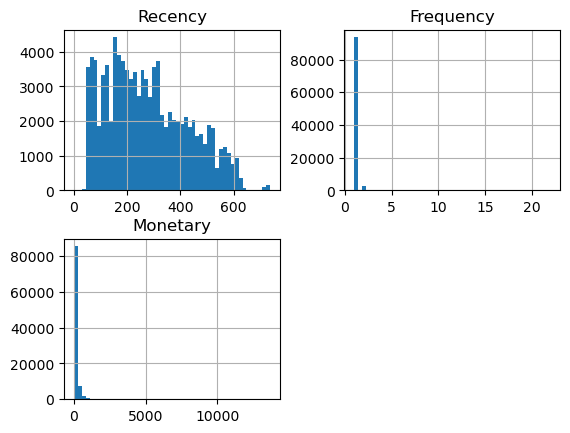

In [151]:
rfm_cluster.hist(bins=50);

In [152]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,5.780744,0.693147,4.751346
000161a058600d5901f007fab4c27140,6.109248,0.693147,4.225519
0001fd6190edaaf884bcaf3d49edf079,6.383507,0.693147,5.280255
0002414f95344307404f0ace7a26f1d5,5.991465,0.693147,5.194899
000379cdec625522490c315e70c7a9fb,5.236442,0.693147,4.682224


In [153]:
rfm_cluster_log.describe()

,Recency,Frequency,Monetary
count,96475.000000,96475.000000,96475.000000
mean,5.443965,0.707100,4.701285
std,0.645683,0.086868,0.800543
min,0.693147,0.693147,1.967112
25%,5.049856,0.693147,4.139637
50%,5.552960,0.693147,4.665324
75%,5.961005,0.693147,5.177392
max,6.602588,3.135494,9.522599


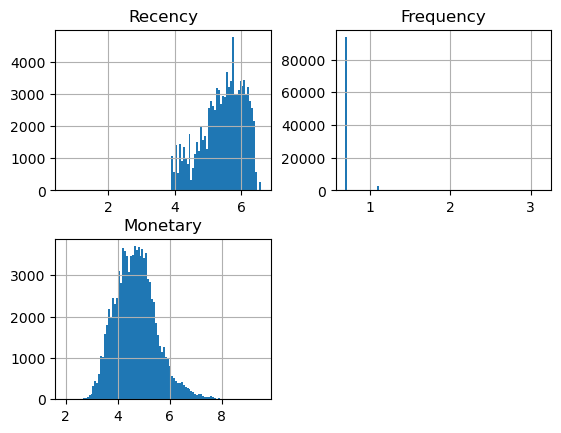

In [154]:
rfm_cluster_log.hist(bins=100);

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)
X = pd.DataFrame(X, columns=rfm_cluster_log.columns)
X

,Recency,Frequency,Monetary
0,0.521588,-0.160619,0.062535
1,1.030360,-0.160619,-0.594307
2,1.455121,-0.160619,0.723226
3,0.847943,-0.160619,0.616603
4,-0.321402,-0.160619,-0.023810
...,...,...,...
96470,-0.142651,-0.160619,-0.211924
96471,-0.296883,7.818713,-0.362487
96472,-0.869104,-0.160619,-0.675011
96473,-0.991116,-0.160619,0.836883


In [158]:
X.describe().round(2)

,Recency,Frequency,Monetary
count,96475.00,96475.00,96475.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-7.36,-0.16,-3.42
25%,-0.61,-0.16,-0.70
50%,0.17,-0.16,-0.04
75%,0.80,-0.16,0.59
max,1.79,27.96,6.02


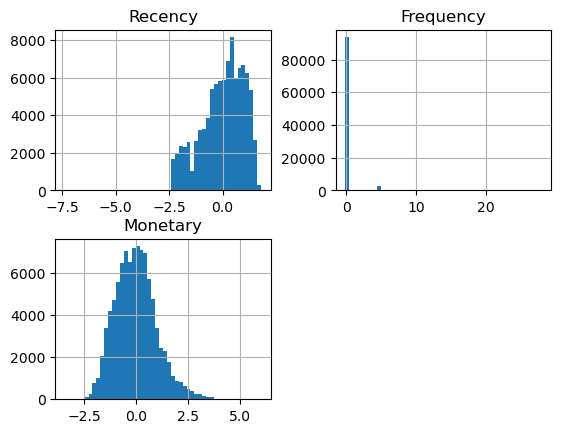

In [159]:
X.hist(bins=50);

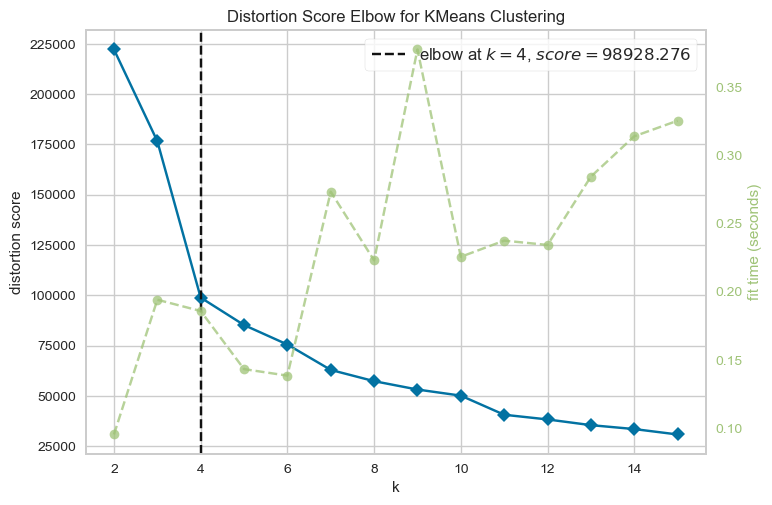

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [168]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=15, n_init_='auto')
KEV.fit(X)
KEV.show()

In [171]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [172]:
pd.Series(kmeans.labels_).value_counts()

2    40259
1    30256
0    25960
Name: count, dtype: int64

In [174]:
rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
customer_id,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,323,1,114.74,2,1,3,213,6,silver,2
000161a058600d5901f007fab4c27140,449,1,67.41,1,1,2,112,4,silver,2
0001fd6190edaaf884bcaf3d49edf079,591,1,195.42,1,1,4,114,6,silver,1
0002414f95344307404f0ace7a26f1d5,399,1,179.35,2,1,4,214,7,silver,1
000379cdec625522490c315e70c7a9fb,187,1,107.01,4,1,3,413,8,silver,0
...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,210,1,91.91,4,5,3,453,12,platinum,2
fffecc9f79fd8c764f843e9951b11341,190,3,81.36,4,5,2,452,11,platinum,2
fffeda5b6d849fbd39689bb92087f431,131,1,63.13,4,5,2,452,11,platinum,0


In [175]:
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])

Cluster,0,1,2
RFM_class,,,
silver,4111,7169,29682
gold,8302,10988,8892
platinum,13547,12099,1685


In [176]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=7, n_init='auto', random_state=42)

In [177]:
pd.Series(kmeans.labels_).value_counts()

1    29059
2    23675
6    16136
0    15595
4     9147
3     2459
5      404
Name: count, dtype: int64